In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [8]:
state_wheather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

In [9]:
start = np.random.randint(0,3)


In [10]:
def step(current):
    next_st = np.random.sample()
    if next_st <= (transition_matrix[current,0]):
        return 0
    if next_st > (transition_matrix[current,0]) and next_st <= (transition_matrix[current,1]) + (transition_matrix[current,0]):
        return 1
    if next_st > (transition_matrix[current,1]) + (transition_matrix[current,0]):
        return 2

In [15]:
states = []
current = start
for i in range(20000):
    current = step(current)
    states.append(state_wheather[current])

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

In [17]:
rainy = []
sunny = []
cloudy = []


rainy_num = 0
sunny_num = 0
cloudy_num = 0


for i in range(20000):
    if states[i] == "sunny":
        sunny_num = sunny_num + 1
    if states[i] == "cloudy":
        cloudy_num = cloudy_num + 1
    if states[i] == "rainy":
        rainy_num = rainy_num + 1
    rainy.append(rainy_num/(i+1))
    cloudy.append(cloudy_num/(i+1))
    sunny.append(sunny_num/(i+1))
    

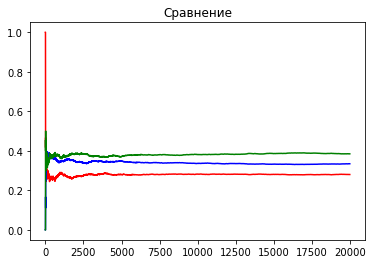

In [22]:
plt.title("Сравнение")
plt.plot(range(20000), rainy, color = 'red')
plt.plot(range(20000), cloudy, color = 'blue')
plt.plot(range(20000), sunny, color = 'green')

plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [24]:
matr = np.dot(transition_matrix,transition_matrix)
for i in range(20000-1):
    matr = np.dot(matr,transition_matrix)
print(matr)

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Получаем, что строки при больших n выглядят примерно одинаково, притом значения вероятностей сходятся к тем, что мы видим на графике.

Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [25]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

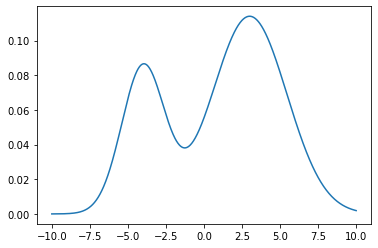

In [26]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()

In [34]:
start = np.random.rand()*10*np.random.choice([-1, 1])

In [40]:
from math import exp, pi, sqrt

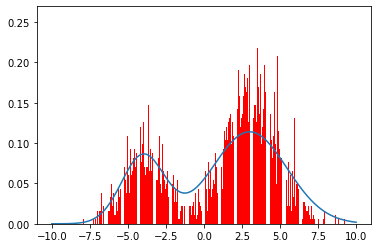

In [59]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

#0.3N(-4, 2) + 0.7N(3, 6)
value = lambda x: ((0.3/sqrt(4*pi))*exp(-(x+4)*(x+4)/4) + (0.7/sqrt(6*pi))*exp(-(x-3)*(x-3)/6))
proposal = lambda x: (x + np.random.rand()*np.random.choice([-1, 1])) 
post = metroplis(1, value, proposal, 50000)

plt.hist(post, bins=5000, rwidth=0.8, density=True, color = "red")
plt.plot(x, y)

plt.show()